<a href="https://colab.research.google.com/github/Shiva1354/Task-4-My-SQL/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving train.csv to train.csv
Dataset Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0


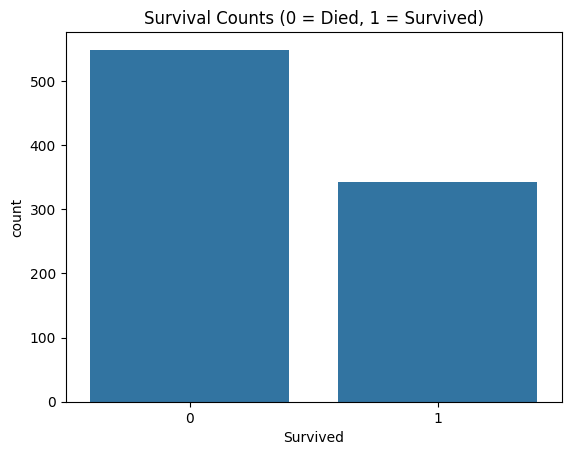

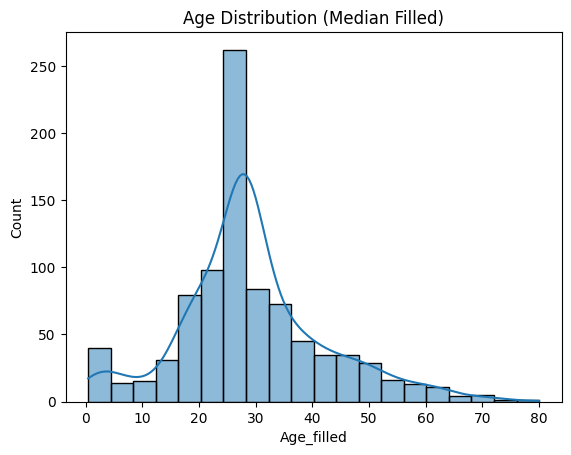

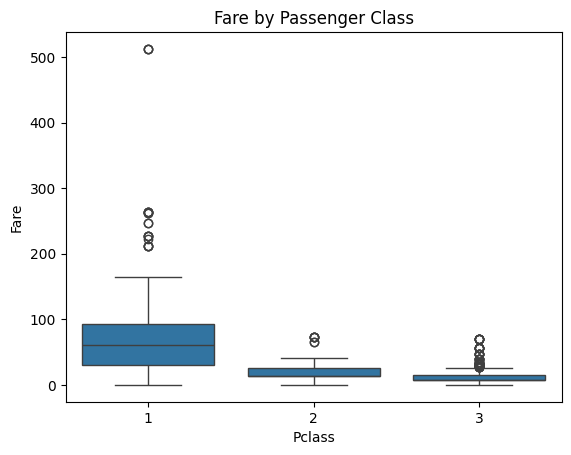

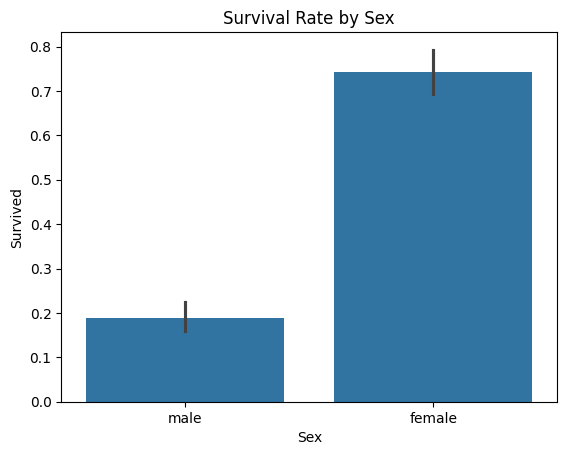

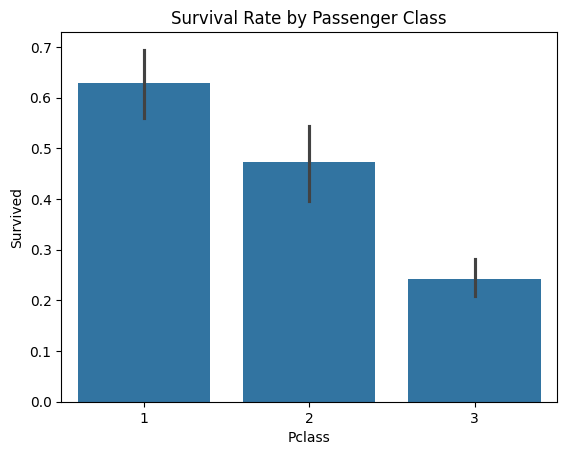

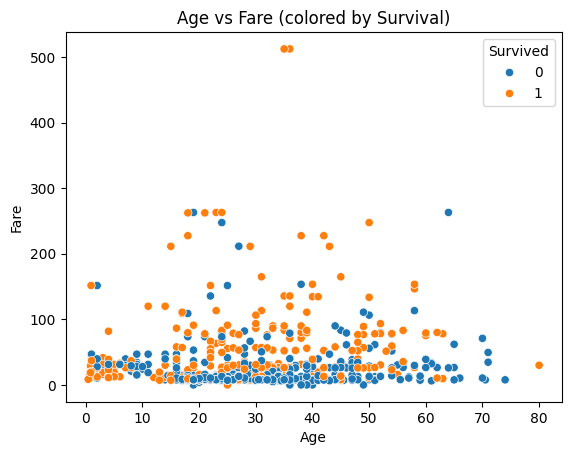

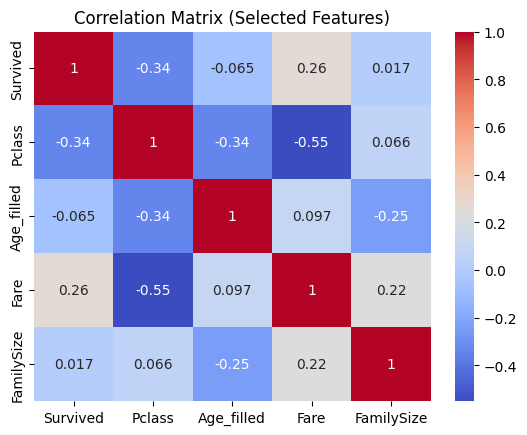

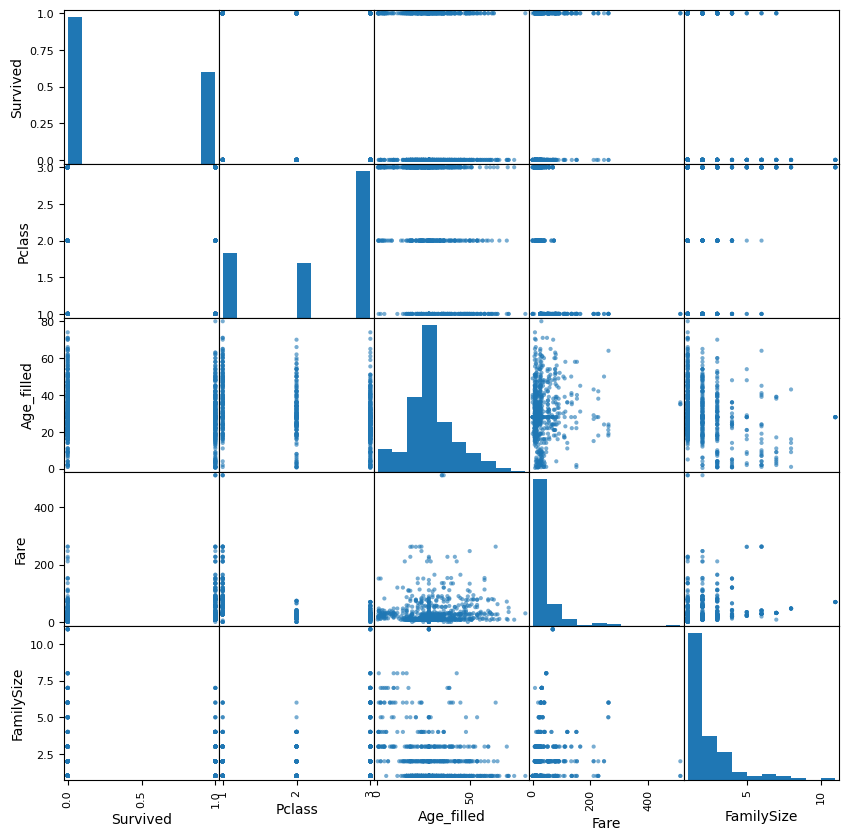

🔍 Key Observations:
- Dataset has 891 rows and 12 columns.
- Females had higher survival rates than males.
- Higher passenger classes had better survival chances.
- Children seem to have better survival chances.
- Fare has outliers with very high values.
- Cabin column has too many missing values, so it might be dropped for modeling.


In [ ]:
# ============================
# Step 1: Import Libraries
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline

# ============================
# Step 2: Upload Dataset
# ============================
from google.colab import files
uploaded = files.upload()  # Choose train.csv from your computer

# Load the dataset
df = pd.read_csv("train.csv")
print("Dataset Shape:", df.shape)
df.head()

# ============================
# Step 3: Data Overview
# ============================
df.info()
df.describe(include='all').transpose()
print("\nMissing Values:\n", df.isnull().sum())

# ============================
# Step 4: Data Cleaning
# ============================
edf = df.copy()
edf['Age_filled'] = edf['Age'].fillna(edf['Age'].median())
edf['Embarked_filled'] = edf['Embarked'].fillna(edf['Embarked'].mode()[0])
edf['FamilySize'] = edf['SibSp'] + edf['Parch'] + 1

# ============================
# Step 5: Univariate Analysis
# ============================
# Survival counts
sns.countplot(x='Survived', data=df)
plt.title("Survival Counts (0 = Died, 1 = Survived)")
plt.show()

# Age distribution
sns.histplot(edf['Age_filled'], bins=20, kde=True)
plt.title("Age Distribution (Median Filled)")
plt.show()

# Fare distribution by class
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare by Passenger Class")
plt.show()

# ============================
# Step 6: Bivariate Analysis
# ============================
# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Sex")
plt.show()

# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

# Age vs Fare colored by survival
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare (colored by Survival)")
plt.show()

# ============================
# Step 7: Correlation Analysis
# ============================
sel = ['Survived', 'Pclass', 'Age_filled', 'Fare', 'FamilySize']
corr = edf[sel].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Selected Features)")
plt.show()

# Pairwise scatter matrix
scatter_matrix(edf[sel], figsize=(10, 10), diagonal='hist', alpha=0.6)
plt.show()

# ============================
# Step 8: Observations
# ============================
print("🔍 Key Observations:")
print(f"- Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print("- Females had higher survival rates than males.")
print("- Higher passenger classes had better survival chances.")
print("- Children seem to have better survival chances.")
print("- Fare has outliers with very high values.")
print("- Cabin column has too many missing values, so it might be dropped for modeling.")
